In [2]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../../dataset/properati.csv"
data = pd.read_csv(filename)

display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
33820,33820,sell,PH,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.593868,-58.424613",-34.593868,...,20.0,NaN,9350.000000,NaN,3.0,NaN,http://www.properati.com.ar/18ap2_venta_ph_pal...,Corredor Responsable: Mónica Silvia Martinuzzi...,VENTA PH 3 AMB APTO PROF EN PALERMO - SIN EXPE...,https://thumbs4.properati.com/6/h61FyTdDf70TgU...
74610,74610,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,NaN,NaN,...,47.0,2488.765957,2488.765957,NaN,NaN,NaN,http://www.properati.com.ar/1ap7h_venta_depart...,VENTA MONOAMBIENTE - CABALLITOVENTA EN POZO - ...,Departamento en Caballito,https://thumbs4.properati.com/0/6GeiWJS2w6VRZG...
103405,103405,sell,apartment,Güemes,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3854454.0,NaN,NaN,...,73.0,2823.529412,3287.671233,NaN,NaN,NaN,http://www.properati.com.ar/1brx3_venta_depart...,DEPARTAMENTO EN CONSTRUCCION 3 AMB 85 M2 A EST...,SEMIPISO EN CONSTRUCCION EN POZO GUEMES MAR DE...,https://thumbs4.properati.com/5/YjWbubl-gkDqny...
67367,67367,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,NaN,NaN,...,180.0,1151.960784,1305.555556,NaN,NaN,NaN,http://www.properati.com.ar/1af6u_venta_casa_t...,"Casa alquilada hasta Marzo 2018, ideal inverso...",CASA en Santa Clara TOMA DEPTO en parte de pago,https://thumbs4.properati.com/8/N7LxBZmLkLW1N8...
74017,74017,sell,store,Coghlan,|Argentina|Capital Federal|Coghlan|,Argentina,Capital Federal,3435359.0,"-34.5613024417,-58.4688422346",-34.561302,...,160.0,2260.638298,5312.500000,NaN,NaN,NaN,http://www.properati.com.ar/1aof5_venta_local_...,PROPIEDAD COMERCIAL Y/O INDUSTRIALDESARROLLADA...,PROPIEDAD COMERCIAL Y/O INDUSTRIAL DESARROLLAD...,https://thumbs4.properati.com/0/ZRGuuxNbkfTt5T...
97411,97411,sell,apartment,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,Bs.As. G.B.A. Zona Oeste,3435607.0,NaN,NaN,...,45.0,NaN,NaN,NaN,NaN,900.0,http://www.properati.com.ar/1bk0e_venta_depart...,DEPARTAMENTO DE 2 AMBIENTES EN CASTELAR NORTE ...,Departamento - Castelar Norte,https://thumbs4.properati.com/3/f6sRcjddw3cUQE...


(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [4]:
print (data.isna().sum()/data.shape[0]*100)

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


In [5]:
# Columna surface_total_in_m2: revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.surface_total_in_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.surface_total_in_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['surface_total_in_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 39328
Porcentaje de registros con NaN: 32.44349117307375
Contamos cantidad de registros unicos:
      surface_total_in_m2  count
0                     0.0    383
1                    10.0     21
2                    11.0      8
3                    12.0     12
4                    13.0      6
...                   ...    ...
1682             100350.0      1
1683             107000.0      4
1684             110000.0      3
1685             154438.0      1
1686             200000.0      2

[1687 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

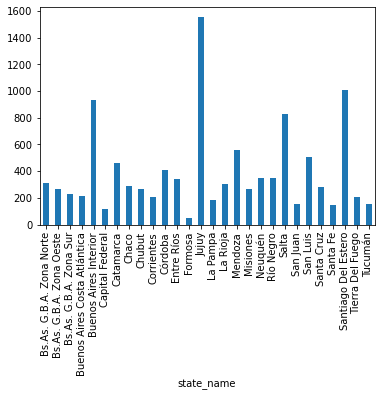

In [6]:
#graficamos el dato por estado con el fin de observar los rangos de areas de superficie total.
#En esta grafica podemos observar la variación en la media de las areas que existen de acuerdo al Estado, se observa como en Juluy el valor medio se eleva, deberia revisarse si corresponde al valor extremo de alguna o algunas propiedades.
data.groupby('state_name')['surface_total_in_m2'].mean().plot.bar()

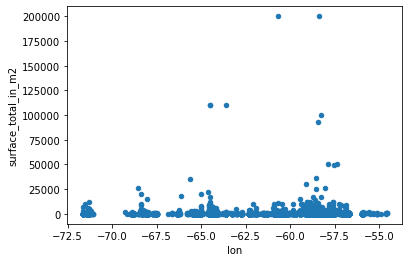

In [7]:
#graficamos un plot para visualizar la dispersión de las superficies totales por longitud 
# y observamos como los valores más extremos en areas totales se ubican en en la longitud cercana a -58 y -61
my_plot_surface_total = data.plot("lon", "surface_total_in_m2", kind="scatter")
plt.show()

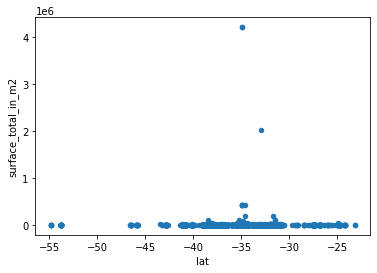

In [14]:
#graficamos un plot para visualizar la dispersión de las superficies totales por latitud
# y observamos como los valores más extremos en areas totales se ubican en en la latitud entre -32 y -35
my_plot_surface_total = data.plot("lat", "surface_total_in_m2", kind="scatter")
plt.show()

# Detalle de análisis de columnas:
* `surface_total_in_m2 ` -> Esta columna tiene 39.328 datos nulos o su equivalente 32,44%. El precio aprox en U$D se calcula sobre esta superficie, por esta razón se considera un dato relevante. Tiene un valor minimo de cero y un maximo de 200.000, datos que se alejan de la media de 233 m2.
Podemos completar algunos de los datos extrayendolos de las columnas title y description
Si se completan las columnas Precio aprox en U$D y Precio en U$d por metro cuadrado puede realizarse un calculo de ete valor.

In [8]:
data.surface_total_in_m2.describe()

count     81892.000000
mean        233.795328
std        1782.222147
min           0.000000
25%          50.000000
50%          84.000000
75%         200.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64

### Detalle de valores extremos en la  columna `surface_total_in_m2`:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar como en apartamentos se evidencian areas muy por encima de los valores medios, en el caso de las casas se observan algunas propiedades alejadas de la media.

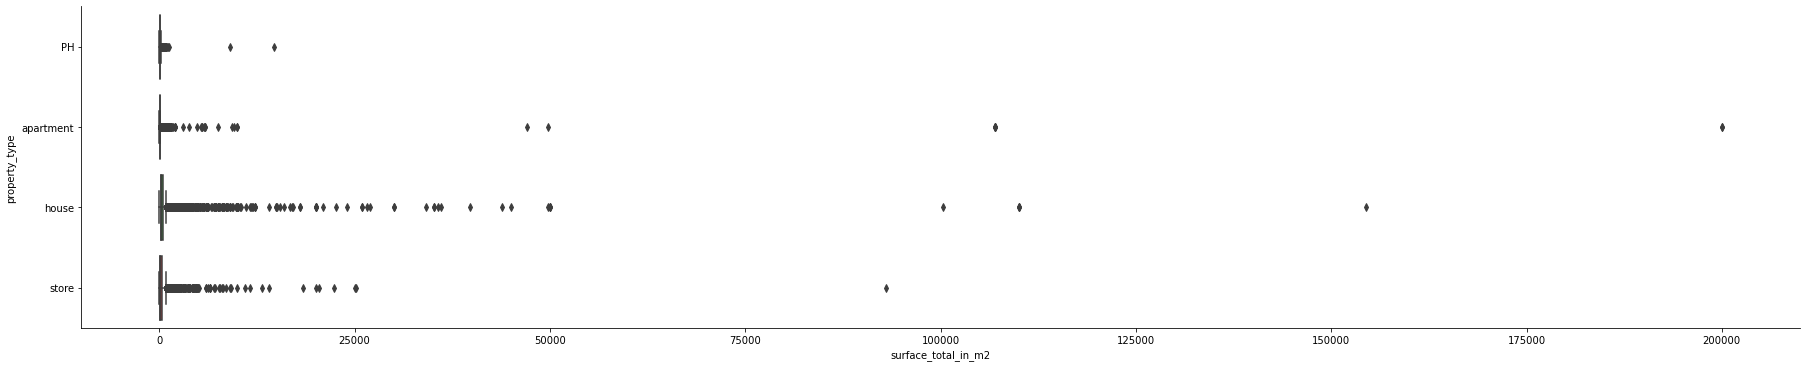

In [9]:
sns.catplot(data=data, x= 'surface_total_in_m2', y="property_type", kind="box", height=5, aspect=5,)


### Regex para rellenar la columna `surface_total_in_m2`:

Vamos a extraer datos de las columnas title y description para extraer esta información, para ello utilizaremos las expresiones de numeros que vengan acompañados del texto m2, M2, metros2, Metros2, mts2 y Mts2, no se consideran los datos separados del número 2 porque se podría incurrir en el error de que haya un dato con el valor M y luego figure el número 2 correspondiente a otras variables.

In [10]:
# Buscamos superficie total en metros cuadrado en los titulos y en la descripción con Mts2

#el area más pequeña es de 0 m2 hay 383 registos en ceros, trae a la base m2, debemos eliminarlos y transformar . a , ???

data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

patron = r'([0-9]*\.?\,?[0-9]*)\s?[m|M|mts|Mts|metros|Metros|METROS]\.?\S*2'
    
regex = re.compile(patron, flags = re.IGNORECASE)

superficie_total_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['surface_total_in_m2'].fillna(superficie_total_titulo, inplace=True)

superficie_total_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['surface_total_in_m2'].fillna(superficie_total_descripcion, inplace=True)


In [11]:
#luego de aplicar el regex se logran recucir el porcentaje de nans al pasar del 32.44% al 23.52%.
print (f'% de valores nulos que quedan luego de aplicar regex: {data.surface_total_in_m2.isna().sum()/data.surface_total_in_m2.shape[0]*100}')
print (f'entradas: {data.surface_total_in_m2.shape[0]}')

% de valores nulos que quedan luego de aplicar regex: 23.52829566078205
entradas: 121220


In [12]:
#Vamos a transformar los datos de la columna ya que al extraer datos de regex se convirtieron en tipo object
data['surface_total_in_m2'] = pd.to_numeric(data['surface_total_in_m2'],errors = 'coerce')

In [13]:
print (f'% de valores nulos que quedan luego de aplicar regex: {data.price_aprox_local_currency.isna().sum()/data.price_aprox_local_currency.shape[0]*100}')
print (f'entradas: {data.price_aprox_local_currency.shape[0]}')

% de valores nulos que quedan luego de aplicar regex: 16.837155584886982
entradas: 121220
